In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

#group city types
urban_city = combined_df.loc[combined_df["type"] == "Urban", :]
suburban_city = combined_df.loc[combined_df["type"] == "Suburban", :]
rural_city = combined_df.loc[combined_df["type"] == "Rural", :]

#sum drivers per city
urban_driver = urban_city.groupby(['city'])['driver_count'].sum()
suburban_driver = suburban_city.groupby(['city'])['driver_count'].sum()
rural_driver = rural_city.groupby(['city'])['driver_count'].sum()

#count rides per city
urban_ride = urban_city.groupby(['city']).count()['ride_id']
suburban_ride = suburban_city.groupby(['city']).count()['ride_id']
rural_ride = rural_city.groupby(['city']).count()['ride_id']

#average fare per city
urban_fare = urban_city.groupby(['city'])['fare'].mean()
suburban_fare = suburban_city.groupby(['city'])['fare'].mean()
rural_fare = rural_city.groupby(['city'])['fare'].mean()

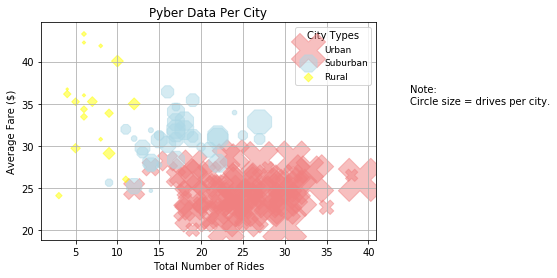

In [52]:
# Build the scatter plots for each city types
plt.scatter(urban_ride, urban_fare, s=urban_driver, marker="X",  facecolors="lightcoral", edgecolors="lightcoral",\
            alpha=.5)
plt.scatter(suburban_ride, suburban_fare, s=suburban_driver, marker="8", facecolors="lightblue", edgecolors="lightblue",\
            alpha= .5)
plt.scatter(rural_ride, rural_fare, marker="D", s = rural_driver, facecolors="yellow", edgecolors="yellow", alpha=.5)

# Incorporate the other graph properties
plt.title("Pyber Data Per City")
plt.xlabel("Total Number of Rides")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(("Urban", "Suburban", "Rural"), title='City Types', fontsize=9, markerscale=1)
# Incorporate a text label regarding circle size
plt.text(45, 35,"Note: \nCircle size = drives per city.")

# Save Figure
plt.savefig("../Images/pyber_data_per_city.png")
plt.show()

In [44]:
print("Went a lil' cray with the colors and shapes :)")
print("Then I changed it back..")

Went a lil' cray with the colors and shapes :)


## Total Fares by City Type

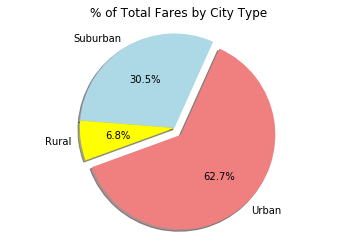

In [51]:
# Calculate Type Percents
urban__city_fare = urban_city["fare"].sum()
suburban__city_fare = suburban_city["fare"].sum()
rural_city_fare = rural_city["fare"].sum()

fares = [urban__city_fare, suburban__city_fare, rural_city_fare]
colors = ["lightcoral", "lightblue", "yellow"]
labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(fares, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%",  shadow=True, startangle=200)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/percent_total_fares.png")
plt.show()

## Total Rides by City Type

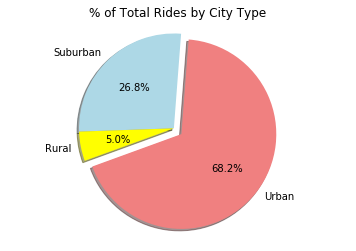

In [53]:
# Calculate Type Percents
urban__city_ride = urban_city["ride_id"].sum()
suburban__city_ride = suburban_city["ride_id"].sum()
rural_city_ride = rural_city["ride_id"].sum()

rides = [urban__city_ride, suburban__city_ride, rural_city_ride]
colors = ["lightcoral", "lightblue", "yellow"]
labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(rides, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%",  shadow=True, startangle=200)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/percent_total_rides.png")
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

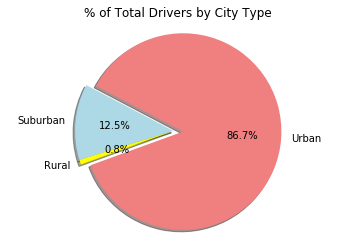

In [54]:
# Calculate Type Percents
urban__city_drivers = urban_city["driver_count"].sum()
suburban__city_drivers = suburban_city["driver_count"].sum()
rural_city_drivers = rural_city["driver_count"].sum()

drivers = [urban__city_drivers, suburban__city_drivers, rural_city_drivers]
colors = ["lightcoral", "lightblue", "yellow"]
labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%",  shadow=True, startangle=200)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("../Images/percent_total_drivers.png")
plt.show()


In [56]:
#Observable trends:
print("1. Rural rides have the highest average fares per ride")
print("2. Urban rides have the lowest average fares per ride but the highest amount of rides")
print("3. Suburban rides have a medium number of rides and moderate average fares")

1. Rural rides have the highest average fares per ride
2. Urban rides have the lowest average fares per ride but the highest amount of rides
3. Suburban rides have a medium number of rides and moderate average fares
